#Assignment

##import 하기

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# sklearn MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("/content/drive/MyDrive/ML/lecture/cancer_reg.csv")
df

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.000000,469,489.800000,61898,260131,11.2,499.748204,39.3,36.9,41.7,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.000000,50,349.700000,49348,21026,14.6,47.560164,45.0,44.0,45.8,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,453.549422,46961,6343,12.4,0.000000,44.2,41.1,48.8,...,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,149.6
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,...,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,150.1
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,...,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,153.9
3045,1962.667684,52,453.549422,50745,25609,13.3,0.000000,39.0,36.9,40.5,...,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,175.0


In [14]:
def linear_regression_assignment():
  #Load dataset
  df = pd.read_csv("cancer_reg.csv")
  


  

##데이터 탐색( Exploratory Data Analysis )

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

:연간 진단된 암 환자의 평균 보고 건수

avgDeathsPerYear: Mean number of reported mortalities due to cancer

:연간 보고된 암 사망자의 평균 수

incidenceRate: Mean per capita (100,000) cancer diagoses

:10만 명 당 암 진단률의 평균

medianIncome: Median income per county 

:지역별 중위 소득

popEst2015: Population of county 

:지역 인구 수

povertyPercent: Percent of populace in poverty 

:가난한 인구 비율

studyPerCap: Per capita number of cancer-related clinical trials per county 

:지역별 암 관련 임상 실험 당 인당 수

MedianAge: Median age of county residents 

:지역 주민들의 중위 연령(나이)

MedianAgeMale: Median age of male county residents 

:남성 지역 주민들의 중앙 나이

MedianAgeFemale: Median age of female county residents 

:여성 지역 주민들의 중앙 나이

PercentMarried: Percent of county residents who are married 

:결혼한 지역 주민 비율

PctNoHS18_24: Percent of county residents ages 18-24 highest education 
attained:less than high school 

:18-24세 지역 주민 중 고등학교 미만 학력 비율

PctHS18_24: Percent of county residents ages 18-24 highest education attained: 
high school diploma 

:18-24세 지역 주민 중 고등학교 졸업 비율

PctBachDeg18_24: Percent of county residents ages 18-24 highest education 
attained: bachelor's degree 

:18-24세 지역 주민 중 학사 학위 소지(대학교 졸업) 비율

PctHS25_Over: Percent of county residents ages 25 and over highest education 
attained: high school diploma 

:25세이상 지역 주민 중 고등학교 졸업 비율

PctBachDeg25_Over: Percent of county residents ages 25 and over highest 
education attained: bachelor's degree 

:25세이상 지역 주민 중 학사 학위 소지(대학교 졸업) 비율

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

:16세이상 지역 주민 중 실직자 비율

PctPrivateCoverage: Percent of county residents with private health coverage 

:사설 건강 보험을 가입한 지역 주민 비율

PctEmpPrivCoverage: Percent of county residents with employee-provided private 
health coverage 

:고용자가 제공하는 사설 건강 보험을 가입한 지역 주민 비율

PctPublicCoverage: Percent of county residents with government-provided health 
coverage 

:정부가 제공하는 사설 건강 보험을 가입한 지역 주민 비율

PctPubliceCoverageAlone: Percent of county residents with government-provided 
health coverage alone 

:정부가 제공하는 사설 건강 보험만을 가입한 지역 주민 비율

PctWhite: Percent of county residents who identify as White 

:백인 비율

PctBlack: Percent of county residents who identify as Black 

:흑인 비율

PctAsian: Percent of county residents who identify as Asian 

:아시아인 인구 비율

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

:백인,흑인,아시아인이 아닌 인종 군 비율

PctMarriedHouseholds: Percent of married households 

:기혼 가구의 비율

BirthRate: Number of live births relative to number of women in county

:여성 인구 대비 출산율

**TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer
mortalities

:10만명 당 평균 암 사망률

In [15]:
df = pd.read_csv("/content/drive/MyDrive/ML/lecture/cancer_reg.csv")
df

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.000000,469,489.800000,61898,260131,11.2,499.748204,39.3,36.9,41.7,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,33.0,32.2,33.7,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.000000,50,349.700000,49348,21026,14.6,47.560164,45.0,44.0,45.8,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,42.8,42.2,43.4,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,48.3,47.8,48.9,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,453.549422,46961,6343,12.4,0.000000,44.2,41.1,48.8,...,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,149.6
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,...,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,150.1
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,...,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,153.9
3045,1962.667684,52,453.549422,50745,25609,13.3,0.000000,39.0,36.9,40.5,...,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,175.0


In [16]:
df.shape

(3047, 29)

In [17]:
#정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   int64  
 2   incidenceRate           3047 non-null   float64
 3   medIncome               3047 non-null   int64  
 4   popEst2015              3047 non-null   int64  
 5   povertyPercent          3047 non-null   float64
 6   studyPerCap             3047 non-null   float64
 7   MedianAge               3047 non-null   float64
 8   MedianAgeMale           3047 non-null   float64
 9   MedianAgeFemale         3047 non-null   float64
 10  AvgHouseholdSize        3047 non-null   float64
 11  PercentMarried          3047 non-null   float64
 12  PctNoHS18_24            3047 non-null   float64
 13  PctHS18_24              3047 non-null   float64
 14  PctBachDeg18_24         3047 non-null   

In [ ]:
#pearsoncorr 상관 관계 분석
pearsoncorr = df.corr(method='pearson')
pearsoncorr

In [ ]:
#pearsoncorr 히트맵
plt.figure(figsize=(15, 15)) #이미지 크기
sns.set(font_scale=0.8)     #폰트 스케일
sns.heatmap(pearsoncorr, annot=True, cbar = True, cmap='Reds')  #annot 값 표시, cbar 오른쪽 바, cmap는 색깔
plt.show()

In [ ]:
# #pearsoncorr 정렬
# Pcorr_order = df.corr(method='pearson').loc[:'BirthRate', 'TARGET_deathRate'].abs().sort_values(ascending=False)
# Pcorr_order

In [ ]:
#상관 관계 분석
df_corr = df.corr()
df_corr

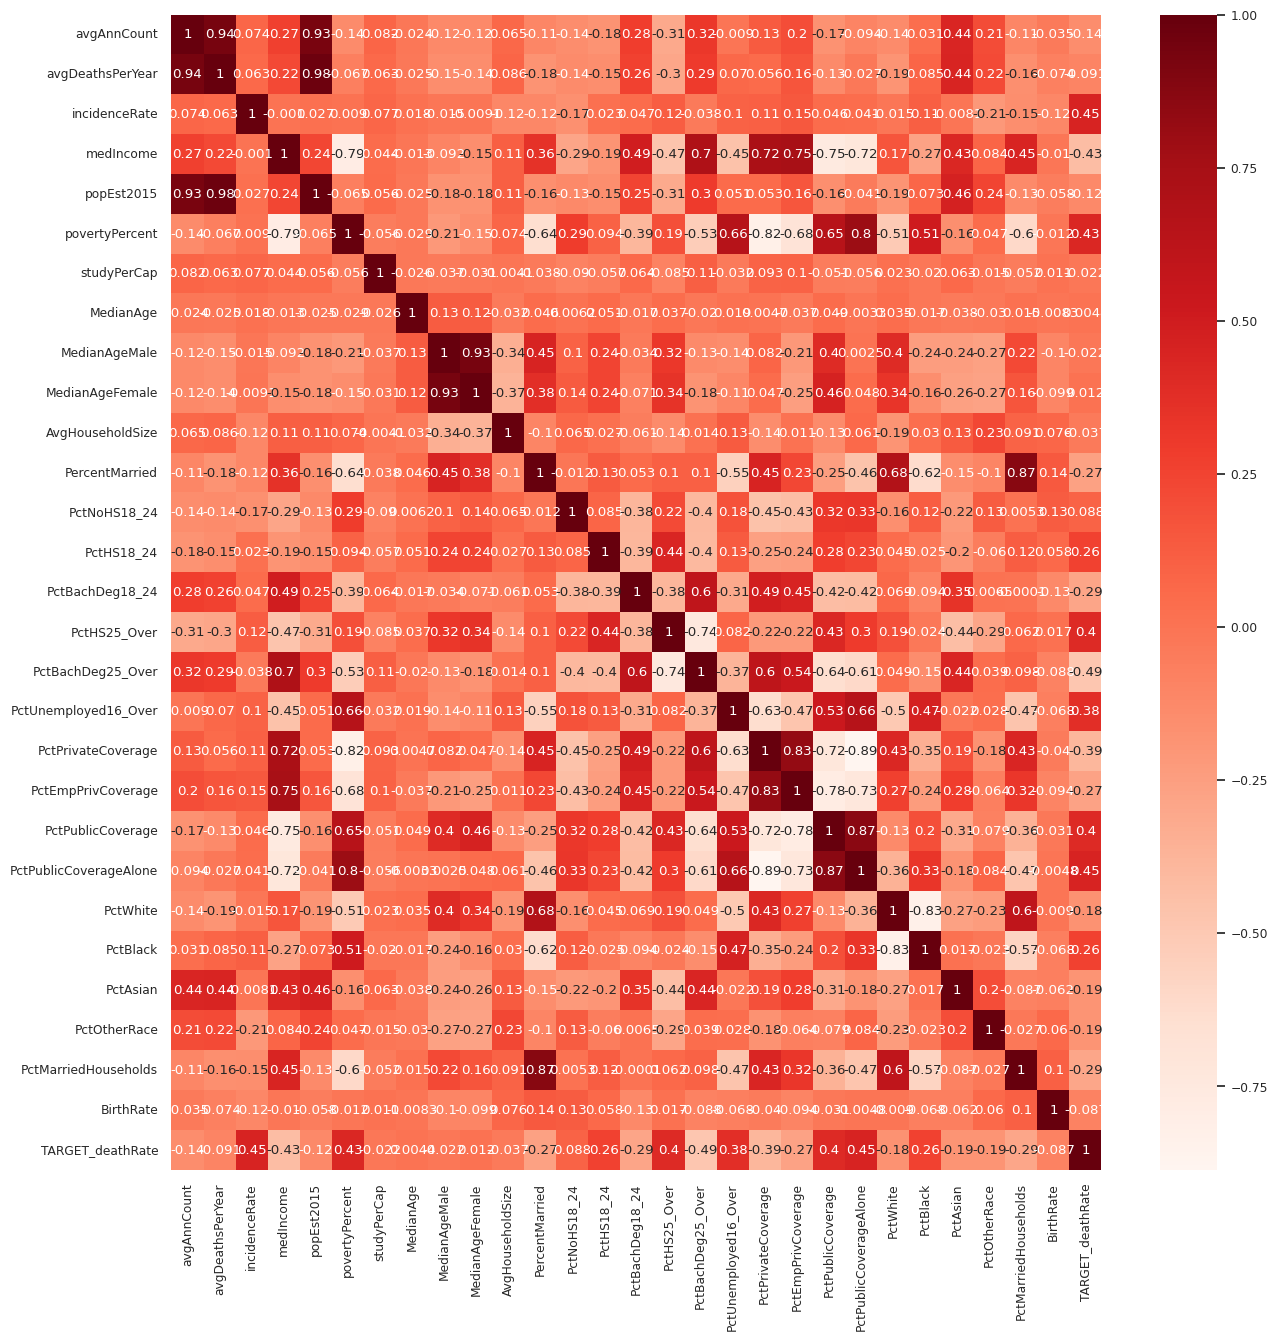

In [22]:
#히트맵
plt.figure(figsize=(15, 15)) #이미지 크기
sns.set(font_scale=0.8)     #폰트 스케일
sns.heatmap(df_corr, annot=True, cbar = True, cmap='Reds')  #annot 값 표시, cbar 오른쪽 바, cmap는 색깔
plt.show()

In [23]:
corr_order = df.corr().loc[:'BirthRate', 'TARGET_deathRate'].abs().sort_values(ascending=False)
corr_order

PctBachDeg25_Over         0.485477
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
medIncome                 0.428615
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctPrivateCoverage        0.386066
PctUnemployed16_Over      0.378412
PctMarriedHouseholds      0.293325
PctBachDeg18_24           0.287817
PctEmpPrivCoverage        0.267399
PercentMarried            0.266820
PctHS18_24                0.261976
PctBlack                  0.257024
PctOtherRace              0.189894
PctAsian                  0.186331
PctWhite                  0.177400
avgAnnCount               0.143532
popEst2015                0.120073
avgDeathsPerYear          0.090715
PctNoHS18_24              0.088463
BirthRate                 0.087407
AvgHouseholdSize          0.036905
studyPerCap               0.022285
MedianAgeMale             0.021929
MedianAgeFemale           0.012048
MedianAge                 0.004375
Name: TARGET_deathRa

In [33]:
columns = df.columns
plot_cols = ['TARGET_deathRate', 'PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone','povertyPercent','medIncome', "MedianAge"]
plot_df = df.loc[:, plot_cols]
plot_df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,0.036467,0.033269,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,0.447005,...,0.491259,0.402597,0.259091,0.797112,0.030190,0.113138,0.043965,0.542157,0.286917,164.9
1,0.004378,0.004783,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231678,0.262673,...,0.526224,0.369202,0.288636,0.880051,0.011275,0.052704,0.089228,0.406297,0.203182,161.3
2,0.002517,0.003355,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,0.541475,...,0.374126,0.573284,0.420455,0.898912,0.008606,0.010932,0.065522,0.571001,0.174879,174.7
3,0.011037,0.014207,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,0.486175,...,0.375874,0.632653,0.509091,0.908071,0.009106,0.027250,0.032498,0.508852,0.215878,194.8
4,0.001337,0.001642,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,0.612903,...,0.377622,0.608534,0.456818,0.934344,0.003144,0.015623,0.011737,0.563423,0.318700,144.4


In [32]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')

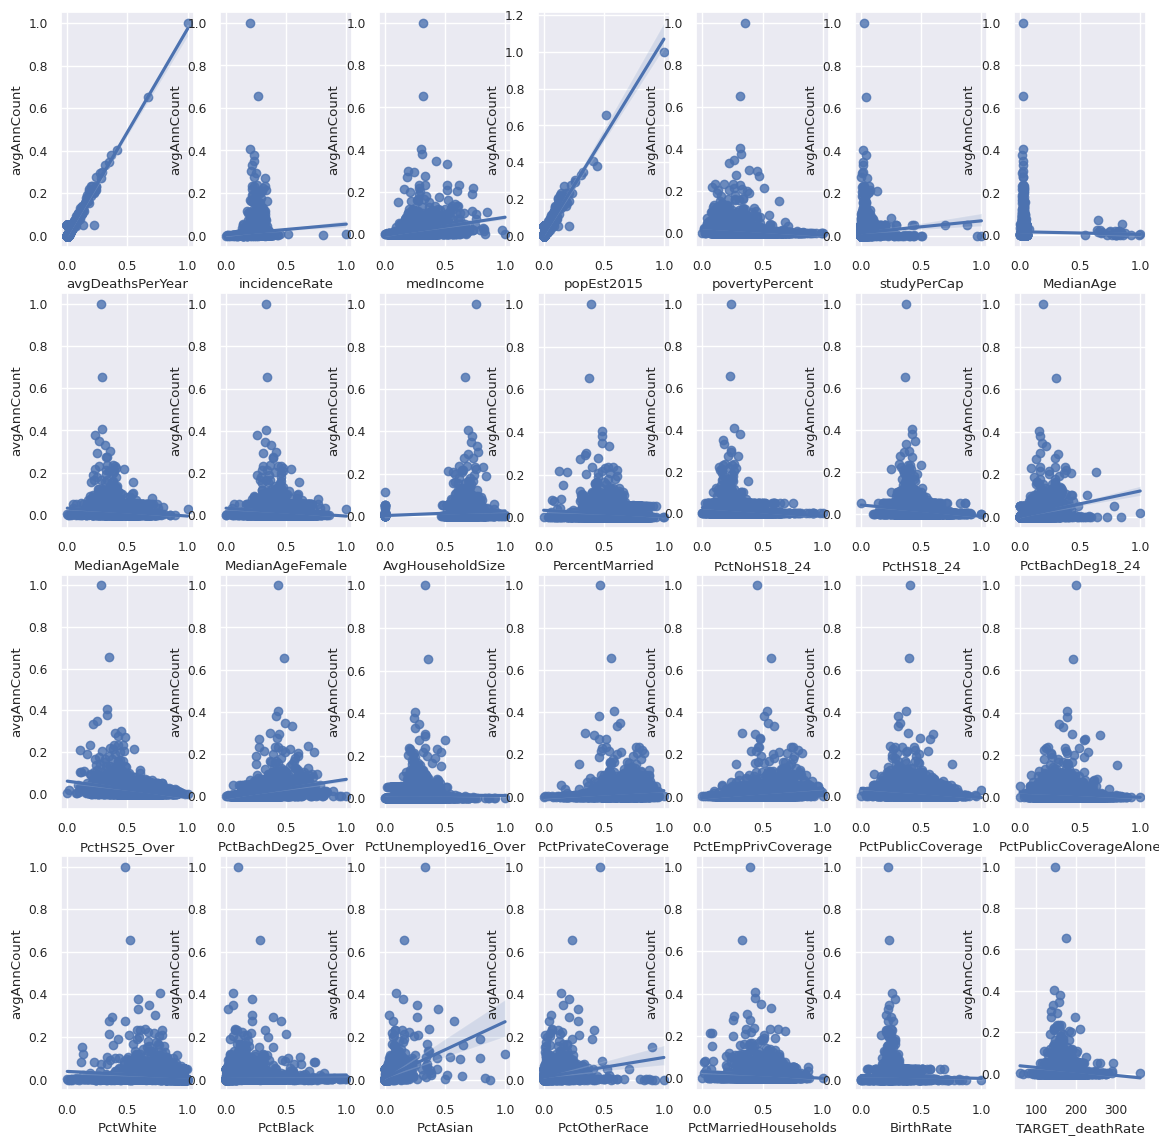

In [43]:
#regplot으로 선형 회귀선 표시
plot_cols = columns
plt.figure(figsize=(14,14))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(4,7,idx+1)
  sns.regplot(x=col, y=plot_cols[-1], data=plot_df, ax=ax1)
plt.show()

In [26]:
#각 column 최대값 확인
df.max()

avgAnnCount               3.815000e+04
avgDeathsPerYear          1.401000e+04
incidenceRate             1.206900e+03
medIncome                 1.256350e+05
popEst2015                1.017029e+07
povertyPercent            4.740000e+01
studyPerCap               9.762309e+03
MedianAge                 6.240000e+02
MedianAgeMale             6.470000e+01
MedianAgeFemale           6.570000e+01
AvgHouseholdSize          3.970000e+00
PercentMarried            7.250000e+01
PctNoHS18_24              6.410000e+01
PctHS18_24                7.250000e+01
PctBachDeg18_24           5.180000e+01
PctHS25_Over              5.480000e+01
PctBachDeg25_Over         4.220000e+01
PctUnemployed16_Over      2.940000e+01
PctPrivateCoverage        9.230000e+01
PctEmpPrivCoverage        7.070000e+01
PctPublicCoverage         6.510000e+01
PctPublicCoverageAlone    4.660000e+01
PctWhite                  1.000000e+02
PctBlack                  8.594780e+01
PctAsian                  4.261942e+01
PctOtherRace             

In [27]:
#각 column 최대값의 index 확인
df.idxmax()

avgAnnCount                999
avgDeathsPerYear           999
incidenceRate             1489
medIncome                  259
popEst2015                 999
povertyPercent            2825
studyPerCap                383
MedianAge                  318
MedianAgeMale             1486
MedianAgeFemale           1486
AvgHouseholdSize           175
PercentMarried             484
PctNoHS18_24              1632
PctHS18_24                2719
PctBachDeg18_24            960
PctHS25_Over              2305
PctBachDeg25_Over         1093
PctUnemployed16_Over      2784
PctPrivateCoverage         259
PctEmpPrivCoverage         259
PctPublicCoverage         1486
PctPublicCoverageAlone     176
PctWhite                   626
PctBlack                  1207
PctAsian                  2313
PctOtherRace              1817
PctMarriedHouseholds       926
BirthRate                 2074
TARGET_deathRate          1489
dtype: int64

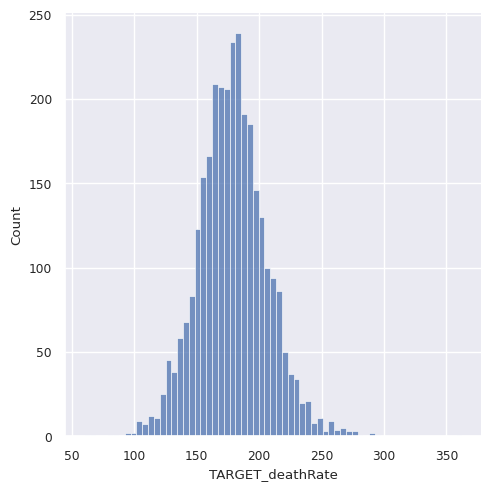

In [28]:
# TARGET 데이터 분포 확인
sns.displot(x='TARGET_deathRate', kind='hist', data=df)
plt.show()

In [29]:
# X = df.drop(['TARGET_deathRate'], axis=1)
# y = df['TARGET_deathRate']

# X


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# y_train = np.asarray(y_train)
# y_test = np.asarray(y_test)
# y_train = scaler.fit_transform(y_train.reshape(-1, 1))
# y_test = scaler.transform(y_test.reshape(-1, 1))

# regr = LinearRegression()
# regr.fit(X_train, y_train)
# print("Training error: ", mean_squared_error(y_train, regr.predict(X_train)))
# print("Test error: ", mean_squared_error(y_test, regr.predict(X_test)))
# print(regr.coef_)
# print(regr.intercept_)
# regr = linear_model.LinearRegression()
# regr.fit()


##데이터 전처리(Normalization)

In [31]:
# sklearn MinMaxScaler 적용
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:, :-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터 프레임에 반영
df.iloc[:,:-1] = df_scaled[:,:]
df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,0.036467,0.033269,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,0.447005,...,0.491259,0.402597,0.259091,0.797112,0.030190,0.113138,0.043965,0.542157,0.286917,164.9
1,0.004378,0.004783,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231678,0.262673,...,0.526224,0.369202,0.288636,0.880051,0.011275,0.052704,0.089228,0.406297,0.203182,161.3
2,0.002517,0.003355,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,0.541475,...,0.374126,0.573284,0.420455,0.898912,0.008606,0.010932,0.065522,0.571001,0.174879,174.7
3,0.011037,0.014207,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,0.486175,...,0.375874,0.632653,0.509091,0.908071,0.009106,0.027250,0.032498,0.508852,0.215878,194.8
4,0.001337,0.001642,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,0.612903,...,0.377622,0.608534,0.456818,0.934344,0.003144,0.015623,0.011737,0.563423,0.318700,144.4


In [ ]:
# train-test 데이터셋 분할
from sklearn.model_selection import train_test_split
x_data = df.loc[:, ['avgDeathsPerYear','popEst2015']]
y_data = df.loc[:, 'TARGET_deathRate']
x_t

##Model Learning(Linear Regression)

##Model 성능 평가(RMSE, r2Score)

##Overfitting 해결(L2 Regularization)

# cd


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cancer = pd.read_csv("/content/drive/MyDrive/ML/lecture/cancer_reg.csv")
# alpha=1.0


X = cancer.drop(['TARGET_deathRate'], axis=1)
y = cancer['TARGET_deathRate']
coef_mean = 0
intercept_mean = 0
print("ready")
for k in range(10):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
    X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5)
    scaler = StandardScaler()  # z-score 정규화
    X_train = scaler.fit_transform(X_train)
    X_validation = scaler.transform(X_validation)
    X_test = scaler.transform(X_test)

    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    y_validation = np.asarray(y_validation)
    y_train = scaler.fit_transform(y_train.reshape(-1, 1))
    y_validation = scaler.transform(y_validation.reshape(-1, 1))
    y_test = scaler.transform(y_test.reshape(-1, 1))
    i=0.0001
    besti=0.0001
    minError=999999999
    maxR2=-1
    while(i < 10):
        regr = Ridge(alpha=i)
        # regr = LinearRegression()
        regr.fit(X_train, y_train)
        r2score=r2_score(y_validation, regr.predict(X_validation))
        RMSE = mean_squared_error(y_validation, regr.predict(X_validation)) ** 0.5
        # print("Training error: ", mean_squared_error(y_train, regr.predict(X_train)) ** 0.5)
        # print("validation error: ", RMSE)
        # print("R^2 score: ", r2score)
        # print(regr.coef_)
        # print(regr.intercept_)
        if(r2score>=maxR2 and minError>=RMSE and (r2score>maxR2 or minError>RMSE) ):
            maxR2 = r2score
            minError = RMSE
            besti = i
        i+=0.01
    # print("best alpha: ", besti)
    regr = Ridge(alpha=besti)
    # regr = LinearRegression()
    regr.fit(X_train, y_train)
    RMSE = mean_squared_error(y_test, regr.predict(X_test)) ** 0.5
    r2score = r2_score(y_test, regr.predict(X_test))
    # print("Training error: ", mean_squared_error(y_train, regr.predict(X_train)) ** 0.5)
    # print("Test error: ", RMSE)
    # print("R^2 score: ", r2score)
    if(not isinstance(coef_mean, np.ndarray)):
        coef_mean = regr.coef_.copy()
    else:
        coef_mean = coef_mean+regr.coef_
    if (not isinstance(intercept_mean, np.ndarray)):
        intercept_mean = regr.intercept_.copy()
    else:
        intercept_mean = intercept_mean + regr.intercept_
    print(k)
    # print(regr.coef_)
    # print(coef_mean)
coef_mean = coef_mean/10
intercept_mean = intercept_mean/10
# print(coef_mean)
# print(intercept_mean)
finalregr = Ridge(besti)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_test, X_validation, y_test, y_validation = train_test_split(X_temp, y_temp, test_size=0.5)
scaler = StandardScaler()  # z-score 정규화
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
y_validation = np.asarray(y_validation)
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_validation = scaler.transform(y_validation.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))
finalregr.fit(X_train, y_train)
finalregr.coef_ = coef_mean.copy()
finalregr.intercept_ = intercept_mean.copy()
# print(finalregr.coef_)
# print(coef_mean)
RMSE = mean_squared_error(y_test, finalregr.predict(X_test)) ** 0.5
r2score = r2_score(y_test, finalregr.predict(X_test))
print("Training error: ", mean_squared_error(y_train, finalregr.predict(X_train)) ** 0.5)
print("Test error: ", RMSE)
print("R^2 score: ", r2score)

coefs_arr = np.asarray(finalregr.coef_)
df_coefs = pd.DataFrame(coefs_arr)
df_coefs.columns = X.columns

# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(1,1,1)
# ax.set_ylim(-0.3, 0.4)
#
# ax.clear()
# ax.set_ylim(-0.3, 0.4)
# ax.tick_params(axis='x', rotation=90)
# ax.set_title("Ridge: Coefficients for each variable", fontsize=20)
plt.bar(range(len(coefs_arr[0])), coefs_arr[0])
plt.rcParams.update({'font.size': 22})
ax=plt.subplot()
ax.set_xticks(list(range(len(coefs_arr[0]))))
ax.set_xticklabels(df_coefs.columns, rotation=90)
plt.show()

# ax.bar(df_coefs.columns, [df_coefs[feature][i] for feature in df_co

#?

In [40]:
import pandas as pd
import numpy as np
import time

class DataLoader:
    def __init__(self):
        return

    @staticmethod
    def load_height_weight(file_name):
        df = pd.read_csv(file_name, sep=',', header=0)
        data_arr = df.to_numpy()
        heights = data_arr[:, 1]
        weights = data_arr[:, 2]
        # convert inch to cm, lb to kg
        heights *= 2.54
        weights *= 0.453592
        return heights, weights

    @staticmethod
    def load_wine_quality(file_name):
        df = pd.read_csv(file_name, sep=';', header=0)
        data_arr = df.to_numpy()
        features = data_arr[:, 0:-1]
        quality = data_arr[:, -1]
        return features, quality

    @staticmethod
    def load_overfit_example():
        x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
        y = [7.9, 7.7, 8.5, 9.8, 10.1, 9.0, 10.5, 10.4]
        x = np.array(x)
        y = np.array(y)
        return x, y

    @staticmethod
    def convert_forest_fire_data(record):
        num_elements = len(record)
        new_list = []
        for i in range(0, num_elements):
            if i == 0:
                one_hot_vec = []
                for j in range(1, 13):
                    if record[i] == j:
                        one_hot_vec.append(1)
                    else:
                        one_hot_vec.append(0)
                for k in one_hot_vec:
                    new_list.append(k)
            elif i == 1:
                one_hot_vec = []
                for j in range(1, 8):
                    if record[i] == j:
                        one_hot_vec.append(1)
                    else:
                        one_hot_vec.append(0)
                for k in one_hot_vec:
                    new_list.append(k)
            else:
                new_list.append(record[i])

        ret_feature = np.array(new_list)
        num_features = len(ret_feature)
        ret_feature = ret_feature.reshape(-1, num_features)
        return ret_feature, num_features

    def convert_forest_fire_data2(record):
        num_elements = len(record)
        new_list = []
        for i in range(0, num_elements):
            if i == 0:
                one_hot_vec = []
                for j in range(1, 13):
                    if record[i] == j:
                        one_hot_vec.append(1)
                    else:
                        one_hot_vec.append(0)
                for k in one_hot_vec:
                    new_list.append(k)
            else:
                new_list.append(record[i])

        ret_feature = np.array(new_list)
        num_features = len(ret_feature)
        ret_feature = ret_feature.reshape(-1, num_features)
        return ret_feature, num_features

    @staticmethod
    def load_forest_fire(file_name):
        df = pd.read_csv(file_name, sep=',', header=0)
        data_arr = df.to_numpy()
        np.random.seed(seed=0)
        np.random.shuffle(data_arr)

        features = data_arr[:, 2:-1]
        num_features = features.shape[1]
        area = data_arr[:, -1]

        features2 = []
        num_features = 0
        for record in features:
            converted_array, num_features = DataLoader.convert_forest_fire_data(record)
            features2.append(converted_array)
        features2 = np.array(features2)
        features2 = features2.reshape(-1, num_features)
        return features2, area

    @staticmethod
    def load_forest_fire2(file_name):
        df = pd.read_csv(file_name, sep=',', header=0)
        data_arr = df.to_numpy()
        seed = int(time.time())
        np.random.seed(seed=seed)
        np.random.shuffle(data_arr)

        features = data_arr[:, 0:-1]
        num_features = features.shape[1]
        area = data_arr[:, -1]
        fire = []
        for fire_area in area:
            if fire_area > 0.0:
                fire.append(np.log(1+fire_area))
            else:
                fire.append(0)
        fire = np.array(fire)


        features2 = []
        num_features = 0
        for record in features:
            converted_array, num_features = DataLoader.convert_forest_fire_data2(record)
            features2.append(converted_array)
        features2 = np.array(features2)
        features2 = features2.reshape(-1, num_features)
        return features2, fire

    @staticmethod
    def load_forest_fire2_classify(file_name):
        df = pd.read_csv(file_name, sep=',', header=0)
        data_arr = df.to_numpy()
        seed = int(time.time())
        np.random.seed(seed=seed)
        np.random.shuffle(data_arr)

        features = data_arr[:, 0:-1]
        num_features = features.shape[1]
        area = data_arr[:, -1]
        fire = []
        for fire_area in area:
            if fire_area > 0.0:
                fire.append(1)
            else:
                fire.append(0)
        fire = np.array(fire)

        features2 = []
        num_features = 0
        for record in features:
            converted_array, num_features = DataLoader.convert_forest_fire_data2(record)
            features2.append(converted_array)
        features2 = np.array(features2)
        features2 = features2.reshape(-1, num_features)
        return features2, fire

    @staticmethod
    def load_forest_fire3(file_name):
        df = pd.read_csv(file_name, sep=',', header=0)
        data_arr = df.to_numpy()
        seed = int(time.time())
        np.random.seed(seed=seed)
        np.random.shuffle(data_arr)

        features = data_arr[:, 1:-1]
        num_features = features.shape[1]
        area = data_arr[:, -1]
        fire = []
        for fire_area in area:
            if fire_area > 0.0:
                fire.append(np.log(1+fire_area))
            else:
                fire.append(0)
        fire = np.array(fire)

        return features, fire

    @staticmethod
    def load_forest_fire3_classify(file_name):
        df = pd.read_csv(file_name, sep=',', header=0)
        data_arr = df.to_numpy()
        seed = int(time.time())
        np.random.seed(seed=seed)
        np.random.shuffle(data_arr)

        features = data_arr[:, 1:-1]
        num_features = features.shape[1]
        area = data_arr[:, -1]
        fire = []
        for fire_area in area:
            if fire_area > 0.0:
                fire.append(1)
            else:
                fire.append(0)
        fire = np.array(fire)

        return features, fire

    @staticmethod
    def load_cancer_reg(file_name):
        df = pd.read_csv(file_name, sep=',', header=0)
        data_arr = df.to_numpy()
        np.random.shuffle(data_arr)

        features = data_arr[:, 0:-1]
        death_rate = data_arr[:, -1]

        return features, death_rate



Linear Regression Overfit Example



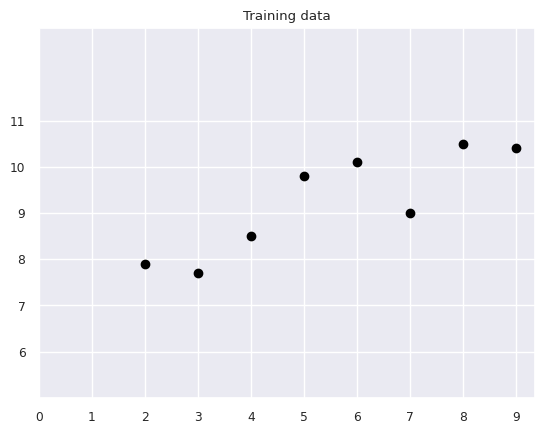

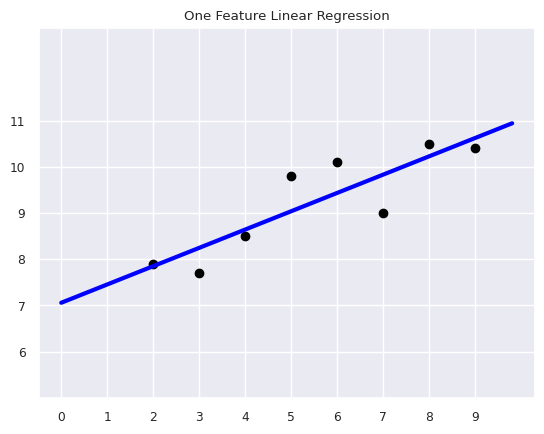

-0.0102	0.3260	-4.1293	26.3653	-88.8855	149.7337	


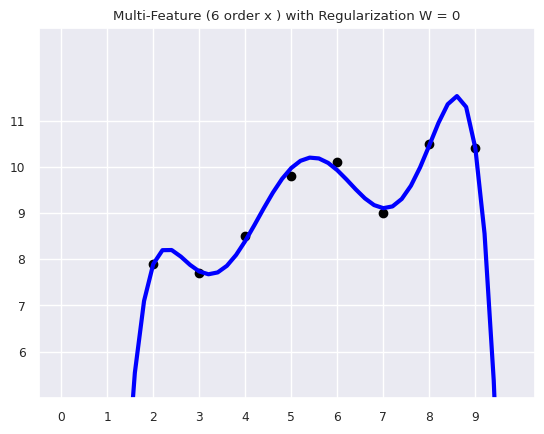

-0.0001	0.0037	-0.0440	0.2035	-0.2211	-0.1469	


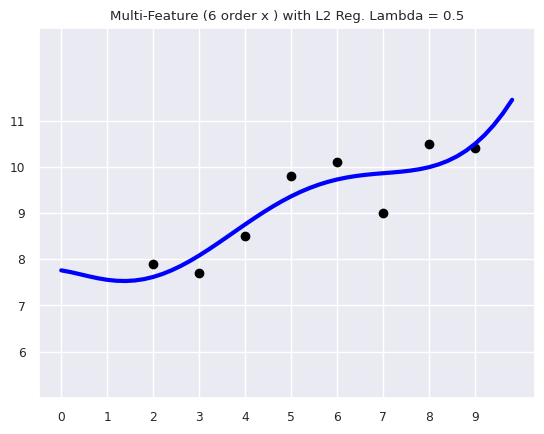

0.0001	-0.0022	0.0093	0.0047	0.0012	0.0002	


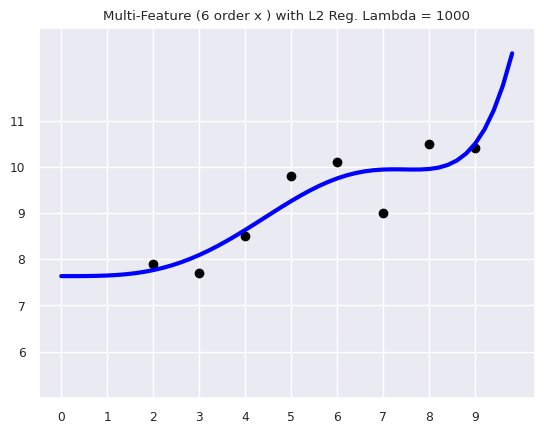

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.278e-01, tolerance: 8.759e-04
  model = cd_fast.enet_coordinate_descent(


0.0000	-0.0001	-0.0007	0.0000	0.0591	0.3212	


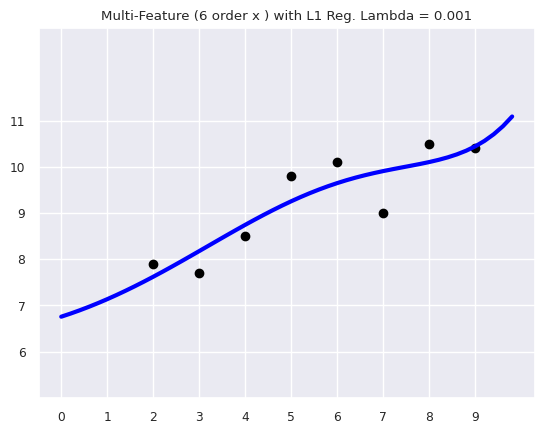

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.602e-02, tolerance: 8.759e-04
  model = cd_fast.enet_coordinate_descent(


-0.0000	0.0003	0.0000	0.0000	0.0000	0.0000	


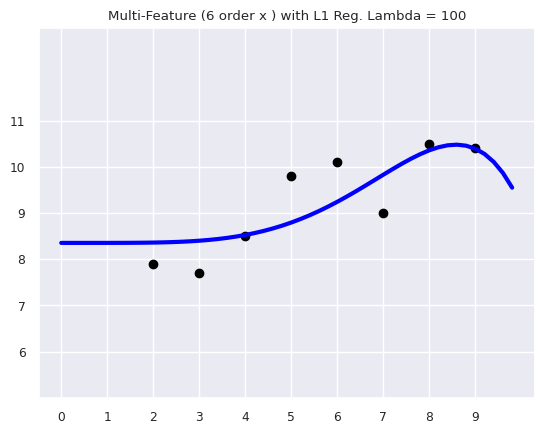

In [41]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
=========================================================
Linear Regression Overfit Example
=========================================================
"""
print(__doc__)
######설명

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#from DataLoader import DataLoader
import numpy as np


def make_6_order_feature_vecs(x):
    x1 = x
    x2 = x * x
    x3 = x2 * x
    x4 = x3 * x
    x5 = x4 * x
    x6 = x5 * x

    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    x3 = x3.reshape(-1, 1)
    x4 = x4.reshape(-1, 1)
    x5 = x5.reshape(-1, 1)
    x6 = x6.reshape(-1, 1)
    features = np.concatenate((x6, x5, x4, x3, x2, x1), axis=1)
    return features


def print_coef(coef):
    coef_array = coef.flatten()
    for val in coef_array:
        print("%.4f" % val, end="\t")
    print("")


def linear_regression_overfit_example():

    # Load the wine features, wine quality dataset
    x, y = DataLoader.load_overfit_example()

    x_train = x.reshape(-1, 1)
    y_train = y.reshape(-1, 1)

    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # Make predictions using the testing set
    x_min = 0
    x_max = 10
    step = 0.2
    test_x = np.arange(x_min, x_max, step).reshape(-1, 1)
    y_pred = regr.predict(test_x)

    # Plot outputs
    plt.scatter(x_train, y_train, color='black')
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(6, 12, step=1))
    plt.ylim([5, 13])
    plt.title('Training data')
    plt.show()

    # Plot outputs
    plt.scatter(x_train, y_train, color='black')
    plt.plot(test_x, y_pred, color='blue', linewidth=3)
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(6, 12, step=1))
    plt.ylim([5, 13])
    plt.title('One Feature Linear Regression')
    plt.show()

    features = make_6_order_feature_vecs(x)
    features = features.reshape(-1, 6)
    regr_multi = linear_model.LinearRegression()

    regr_multi.fit(features, y_train)

    # Make predictions using the testing set
    x_min = 0
    x_max = 10
    step = 0.2
    test_x = np.arange(x_min, x_max, step).reshape(-1, 1)
    test_features = make_6_order_feature_vecs(test_x)

    y_pred = regr_multi.predict(test_features)
    print_coef(regr_multi.coef_)
    # Plot outputs
    plt.scatter(x_train, y_train, color='black')
    plt.plot(test_x, y_pred, color='blue', linewidth=3)
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(6, 12, step=1))
    plt.ylim([5, 13])
    plt.title('Multi-Feature (6 order x ) with Regularization W = 0')
    plt.show()

    ##### L2 Regularization W = 0.5
    ridge = linear_model.Ridge(alpha=0.5)
    ridge.fit(features, y_train)
    y_pred = ridge.predict(test_features)
    print_coef(ridge.coef_)
    # Plot outputs
    plt.scatter(x_train, y_train, color='black')
    plt.plot(test_x, y_pred, color='blue', linewidth=3)
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(6, 12, step=1))
    plt.ylim([5, 13])
    plt.title('Multi-Feature (6 order x ) with L2 Reg. Lambda = 0.5')
    plt.show()

    ##### L2 Regularization W = 1000
    ridge = linear_model.Ridge(alpha=1000)
    ridge.fit(features, y_train)
    y_pred = ridge.predict(test_features)
    print_coef(ridge.coef_)
    # Plot outputs
    plt.scatter(x_train, y_train, color='black')
    plt.plot(test_x, y_pred, color='blue', linewidth=3)
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(6, 12, step=1))
    plt.ylim([5, 13])
    plt.title('Multi-Feature (6 order x ) with L2 Reg. Lambda = 1000')
    plt.show()


    # L1 Regularization W = 0.001
    lasso = linear_model.Lasso(alpha=0.001)
    lasso.fit(features, y_train)
    y_pred = lasso.predict(test_features)
    print_coef(lasso.coef_)
    # Plot outputs
    plt.scatter(x_train, y_train, color='black')
    plt.plot(test_x, y_pred, color='blue', linewidth=3)
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(6, 12, step=1))
    plt.ylim([5, 13])
    plt.title('Multi-Feature (6 order x ) with L1 Reg. Lambda = 0.001')
    plt.show()


    # L1 Regularization W = 100
    lasso = linear_model.Lasso(alpha=100)
    lasso.fit(features, y_train)
    y_pred = lasso.predict(test_features)
    print_coef(lasso.coef_)
    # Plot outputs
    plt.scatter(x_train, y_train, color='black')
    plt.plot(test_x, y_pred, color='blue', linewidth=3)
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(6, 12, step=1))
    plt.ylim([5, 13])
    plt.title('Multi-Feature (6 order x ) with L1 Reg. Lambda = 100')
    plt.show()

if __name__ == '__main__':
    linear_regression_overfit_example()
